In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
yt_df = pd.read_csv("USvideosv.csv")
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [20]:
corr_likes = yt_df['views'].corr(yt_df['likes'])
corr_dislikes = yt_df['views'].corr(yt_df['dislikes'])
corr_table = yt_df[['views', 'likes', 'dislikes', 'comment_count']].corr()
corr_table


,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


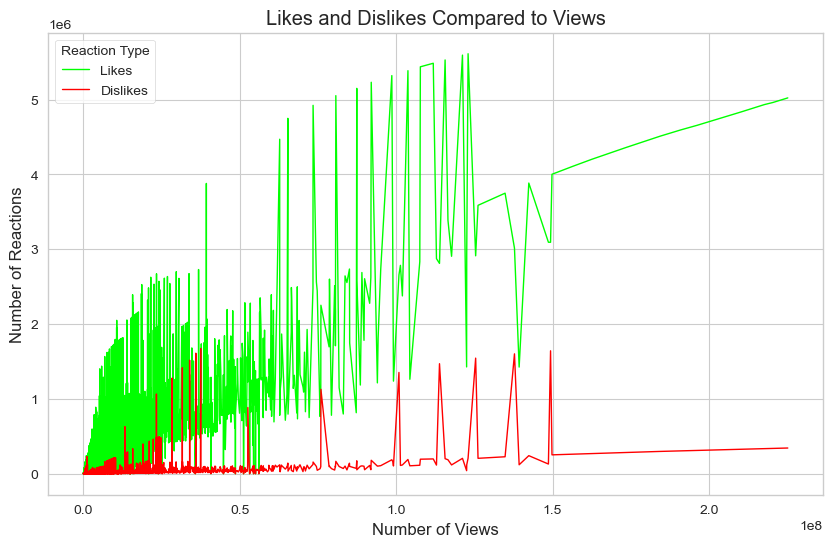

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")


yt_df_sorted = yt_df.sort_values('views')

plt.figure(figsize=(10,6))

plt.plot(yt_df_sorted['views'], yt_df_sorted['likes'], color='lime', label='Likes', linewidth=1)
plt.plot(yt_df_sorted['views'], yt_df_sorted['dislikes'], color='red', label='Dislikes', linewidth=1)

plt.title("Likes and Dislikes Compared to Views")
plt.xlabel("Number of Views")
plt.ylabel("Number of Reactions")
plt.legend(title="Reaction Type")

plt.show()


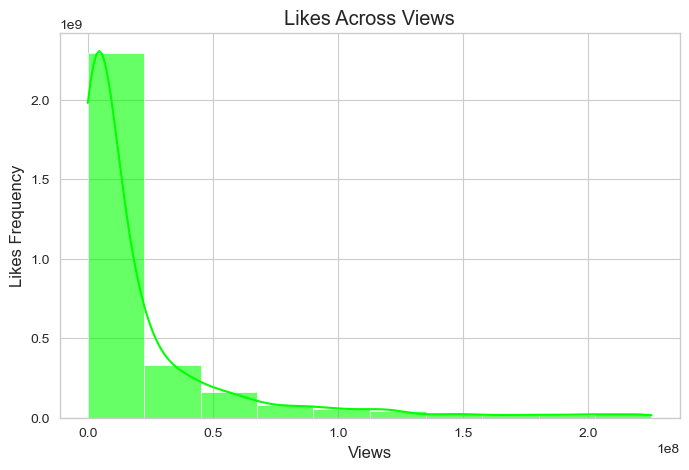

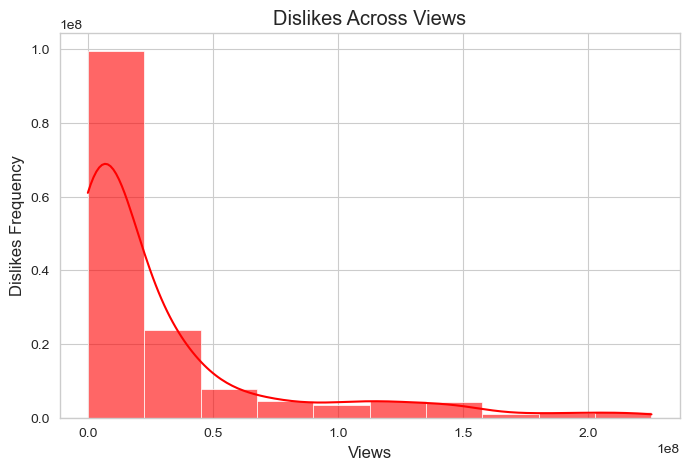

In [27]:


sns.set_style("whitegrid")
sns.set_palette("bright")

plt.figure(figsize=(8,5))
sns.histplot(data=yt_df, x='views', weights='likes', bins=10, kde=True, color='lime', alpha=0.6)
plt.xlabel("Views")
plt.ylabel("Likes Frequency")
plt.title("Likes Across Views")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=yt_df, x='views', weights='dislikes', bins=10, kde=True, color='red', alpha=0.6)
plt.xlabel("Views")
plt.ylabel("Dislikes Frequency")
plt.title("Dislikes Across Views")
plt.show()


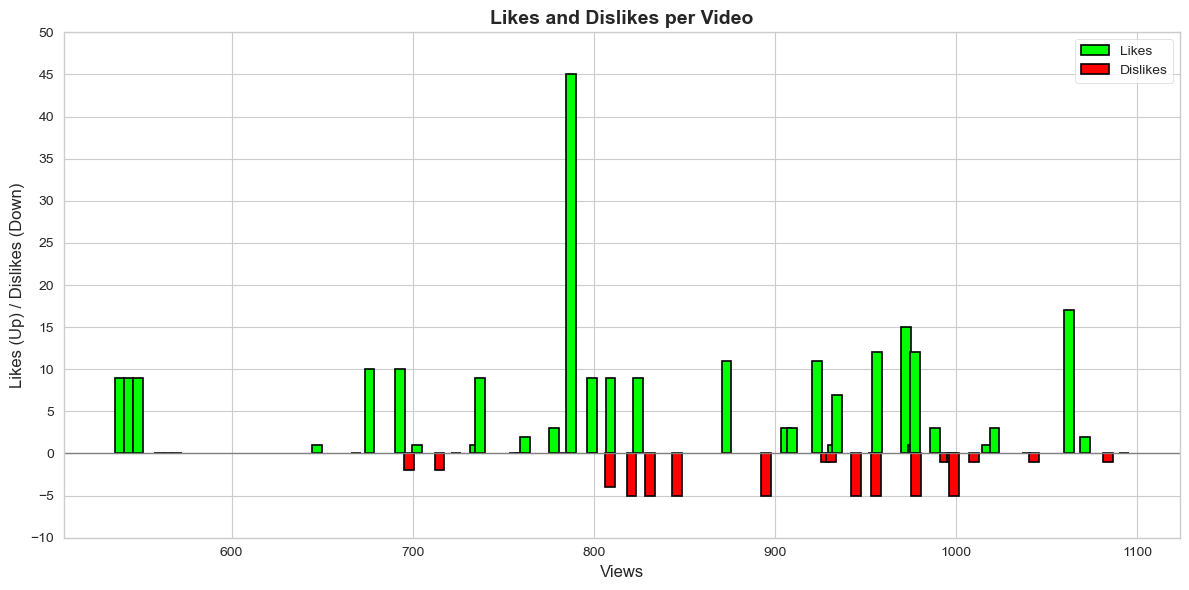

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

yt_df_sorted = yt_df.sort_values('views')
yt_df_zoomed = yt_df_sorted[yt_df_sorted['views'] <= yt_df_sorted['views'].quantile(0.95)]
yt_df_zoomed = yt_df_zoomed.head(30)

plt.figure(figsize=(12,6))


bar_width = yt_df_zoomed['views'].max() / 120
offset = bar_width * 1.2

plt.bar(
    yt_df_zoomed['views'] - offset,
    yt_df_zoomed['likes'],
    color='lime',
    label='Likes',
    width=bar_width * 0.6,    
    edgecolor='black',
    linewidth=1.2
)


plt.bar(
    yt_df_zoomed['views'] + offset,
    -yt_df_zoomed['dislikes'],
    color='red',
    label='Dislikes',
    width=bar_width * 0.6,
    edgecolor='black',
    linewidth=1.2
)

plt.axhline(0, color='gray', linewidth=1)

plt.title("Likes and Dislikes per Video", fontsize=14, fontweight='bold')
plt.xlabel("Views")
plt.ylabel("Likes (Up) / Dislikes (Down)")
plt.ylim(-10, 50)
plt.yticks(np.arange(-10, 55, 5))
plt.legend()

plt.tight_layout()
plt.show()





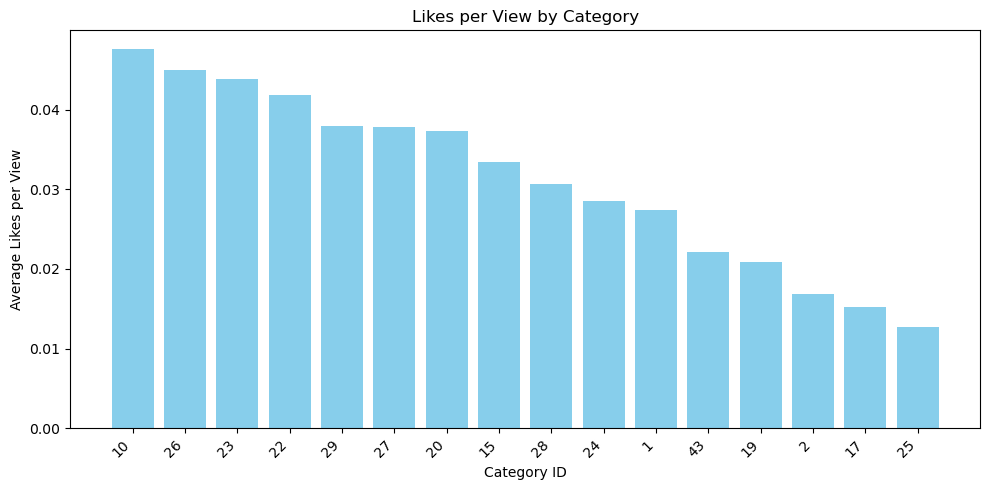

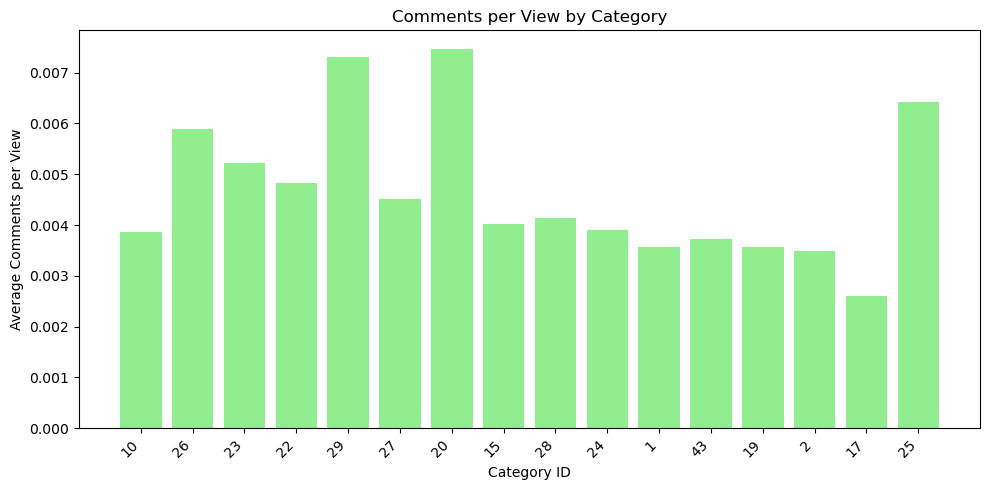

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


yt_df = pd.read_csv("USvideosv.csv")

# Convert columns to numeric
yt_df["views"] = pd.to_numeric(yt_df["views"], errors="coerce")
yt_df["likes"] = pd.to_numeric(yt_df["likes"], errors="coerce")
yt_df["dislikes"] = pd.to_numeric(yt_df["dislikes"], errors="coerce")
yt_df["comment_count"] = pd.to_numeric(yt_df["comment_count"], errors="coerce")

# Drop missing rows and make sure views > 0
yt_df = yt_df.dropna(subset=["views", "likes", "dislikes", "comment_count"])
yt_df = yt_df[yt_df["views"] > 0].copy()


yt_df["likes_per_view"] = (yt_df["likes"] / yt_df["views"]).clip(upper=0.5)
yt_df["comments_per_view"] = (yt_df["comment_count"] / yt_df["views"]).clip(upper=0.5)

# Group by category_id
cat_df = (
    yt_df.groupby("category_id")[["likes_per_view", "comments_per_view"]]
         .mean()
         .sort_values("likes_per_view", ascending=False)
         .reset_index()
)


# Likes per view
plt.figure(figsize=(10, 5))
plt.bar(cat_df["category_id"].astype(str), cat_df["likes_per_view"], color="skyblue")
plt.xlabel("Category ID")
plt.ylabel("Average Likes per View")
plt.title("Likes per View by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Comments per view
plt.figure(figsize=(10, 5))
plt.bar(cat_df["category_id"].astype(str), cat_df["comments_per_view"], color="lightgreen")
plt.xlabel("Category ID")
plt.ylabel("Average Comments per View")
plt.title("Comments per View by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()git push
plt.show()

